<a href="https://colab.research.google.com/github/AbdullahKhan-dev/Spotify-Songs-Popularity-Predictor-/blob/main/Group_Project_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:-

### You have been hired by a music streaming company, Spotify,to help improve its efforts at recommending new songs to users using its streaming service. The company wants to predict which songsare likely to be popular in the future when they are released, and based on this, the company wants to make their recommendation system more effective.The file “songs.csv” contains a set of data collected on top songs in the U.S. Spotify chart during 1999-2015. Each record provides information on a song’s characteristics. For clarity, the variables in the dataset are defined below.

1.	artist: Name of the Artist.
2.	song: Name of the Track.
3.	Song_name_len: Length of song name
4.	duration_ms: Duration of the track in milliseconds.
5.	explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
6.	year: Release Year of the track.
7.	popularity: The higher the value the more popular the song is.
8.	hot: 1 popularity is greater than 75 and 0 otherwise.
9.	danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
10.	energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
11.	key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
12.	loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
13.	mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
14.	speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
15.	acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
16.	instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
17.	liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
18.	valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
19.	tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
20.	genre: Genre of the track.
21.	pop: 1 if genre contains pop and 0 otherwise
22.	rock: 1 if genre contains rock and 0 otherwise
23.	hiphop: 1 if genre contains hip hop and 0 otherwise
24.	dance: 1 if genre contains dance and 0 otherwise
25.	folk: 1 if genre contains folk and 0 otherwise
26.	rnb: 1 if genre contains R&B and 0 otherwise
27.	latin: 1 if genre contains latin and 0 otherwise



Importing the libraries and dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # This is for train/test split
from sklearn.tree import DecisionTreeClassifier # These are for tree induction
import sklearn.model_selection as ms                # These are for tree induction
from sklearn import tree                                      # These are for tree induction
from sklearn.metrics import classification_report, confusion_matrix  # for tree evaluation
from IPython.display import Image                       # These are for tree visualization
import pydotplus                                                   # These are for tree visualization
import os
from sklearn.metrics import roc_auc_score                    # These are for tree visualization

In [ ]:
file_path='/content/drive/MyDrive/songs-4.csv'
df=pd.read_csv(file_path, encoding = "latin1")
df.head(2)


,artist,song,song_name_len,duration_ms,explicit,year,popularity,danceability,energy,key,...,valence,tempo,genre,pop,rock,hiphop,dance,folk,rnb,latin
0,DEV,In The Dark,11,226226,False,2012,52,0.736,0.824,8,...,0.4430,124.954,"pop, Dance/Electronic",1,0,0,1,0,0,0
1,Adele,Skyfall,7,286480,False,2012,74,0.346,0.552,0,...,0.0789,75.881,"pop, R&B",1,0,0,0,0,1,0


In [ ]:
df.shape

(301, 26)

### Observation:- There are 301 records and 26 attributes in the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            301 non-null    object 
 1   song              301 non-null    object 
 2   song_name_len     301 non-null    int64  
 3   duration_ms       301 non-null    int64  
 4   explicit          301 non-null    bool   
 5   year              301 non-null    int64  
 6   popularity        301 non-null    int64  
 7   danceability      301 non-null    float64
 8   energy            301 non-null    float64
 9   key               301 non-null    int64  
 10  loudness          301 non-null    float64
 11  mode              301 non-null    int64  
 12  speechiness       301 non-null    float64
 13  acousticness      301 non-null    float64
 14  instrumentalness  301 non-null    float64
 15  liveness          301 non-null    float64
 16  valence           301 non-null    float64
 1

### Remove missing value records

In [ ]:
display(df.isna().sum())
df = df.dropna()

artist              0
song                0
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
dtype: int64

## **Exploratory Data Analysis and Data Preprocessing**

### Summary Statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
song_name_len,301.0,18.468439,12.956974,2.000000,9.00000,14.000000,26.000000,75.000
duration_ms,301.0,226028.511628,37478.627093,150400.000000,204280.00000,223386.000000,240400.000000,484146.000
year,301.0,2013.318937,1.526851,2012.000000,2012.00000,2013.000000,2014.000000,2020.000
popularity,301.0,55.920266,26.192244,0.000000,50.00000,66.000000,74.000000,89.000
danceability,301.0,0.647801,0.127955,0.180000,0.56000,0.660000,0.729000,0.964
energy,301.0,0.737040,0.148655,0.054900,0.65200,0.771000,0.844000,0.985
key,301.0,5.308970,3.544134,0.000000,2.00000,5.000000,8.000000,11.000
loudness,301.0,-5.397937,1.909973,-20.514000,-6.54200,-5.217000,-4.135000,-1.569
mode,301.0,0.564784,0.496611,0.000000,0.00000,1.000000,1.000000,1.000
speechiness,301.0,0.083154,0.077418,0.024900,0.03790,0.050300,0.091200,0.420


In [ ]:
df['year'].value_counts()

2012    100
2013     89
2014     85
2015      8
2019      8
2016      5
2017      2
2018      2
2020      2
Name: year, dtype: int64

duration_ms
Skew : 1.73


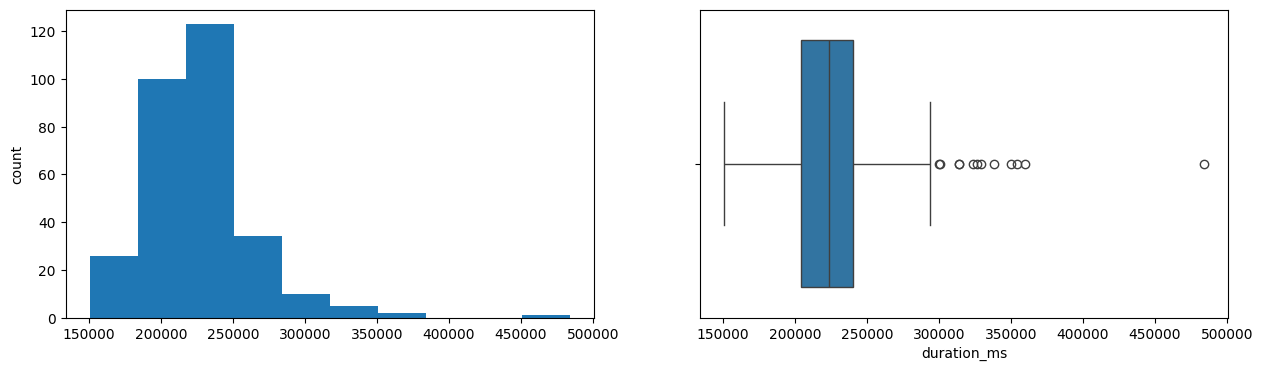

year
Skew : 2.17


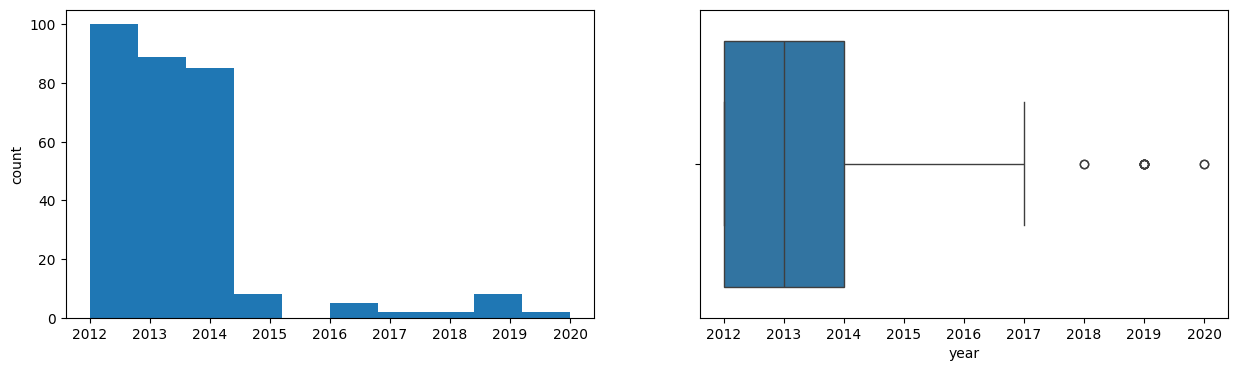

popularity
Skew : -1.31


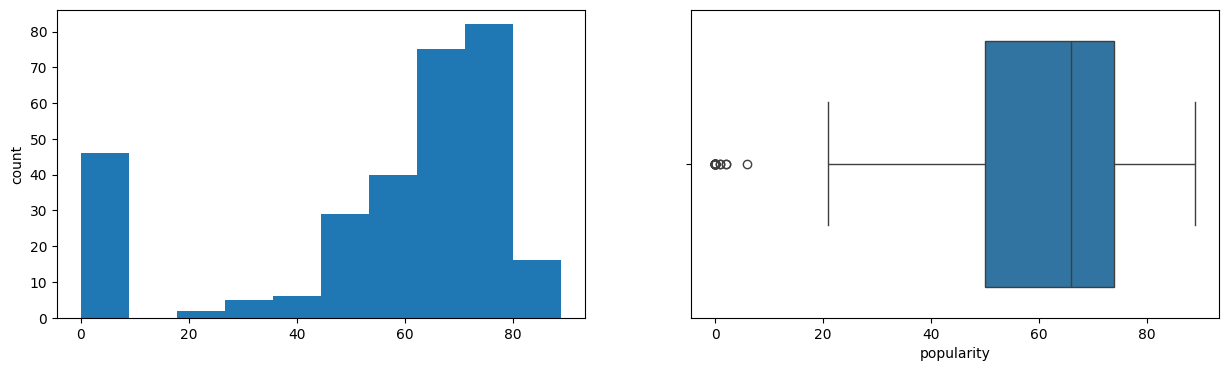

energy
Skew : -0.95


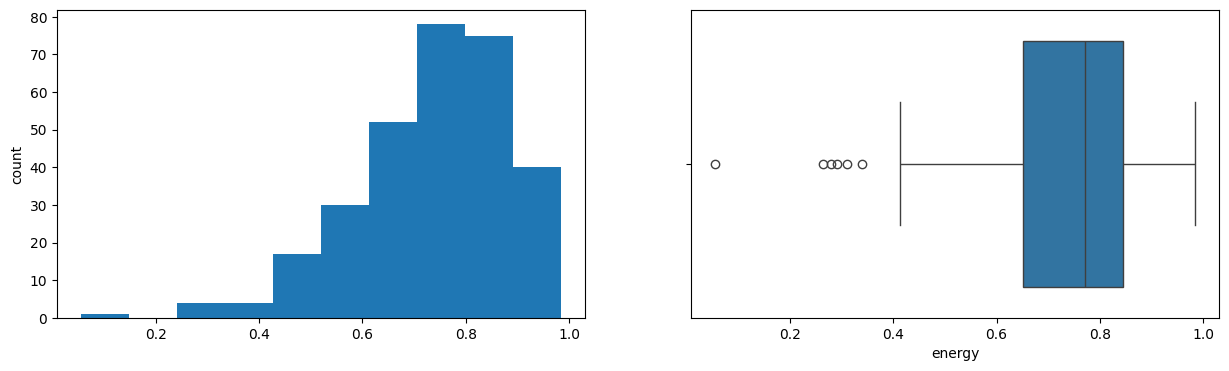

In [ ]:
#### Check the distribution and outliers for numerical columns in the data
data=df
for col in ['duration_ms', 'year','popularity','energy']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

### Observations:-
1. The release year ranges from 2012 to 2020 and the distribution is highly left skewed. 91% of the observations are from 2012-2014.
2. The attribute duration_ms is highly left skewed.

<ipython-input-11-42e68766273c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr(method='pearson')


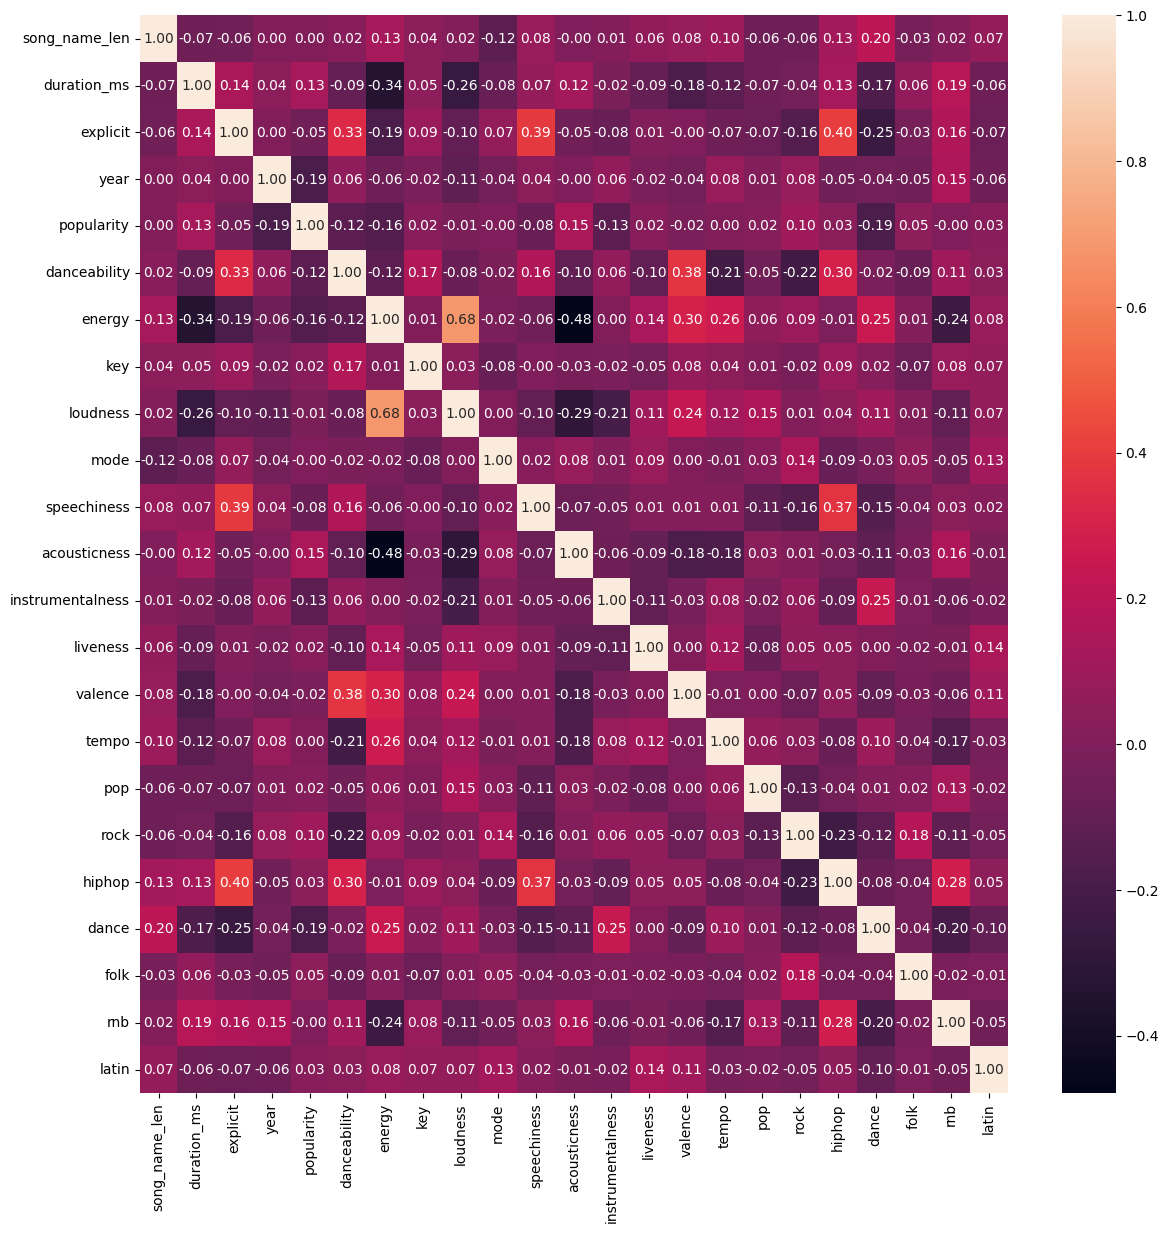

In [ ]:
df_corr=df.corr(method='pearson')
plt.figure(figsize=(14,14))
sns.heatmap(df_corr, annot=True, fmt='0.2f')
plt.show()

### Observations:
1. The correlation coefficient of 0.68 suggests that there is a strong positive relationship between loudness and energy.
2. The correlation coefficient of -0.48 suggests that there is a moderate negative relationship between acousticness and energy.

# Data Preprocessing

In [ ]:
df["duration_s"]=df["duration_ms"].apply(lambda x: round(x/1000))
df.shape

(301, 27)

##Converting the target variable into a categorical variable

In [ ]:
df['popularity'] = df['popularity'].apply(lambda x: 1 if x > 50 else 0)

display(df['popularity'].value_counts())



1    224
0     77
Name: popularity, dtype: int64

duration_s
Skew : 1.73


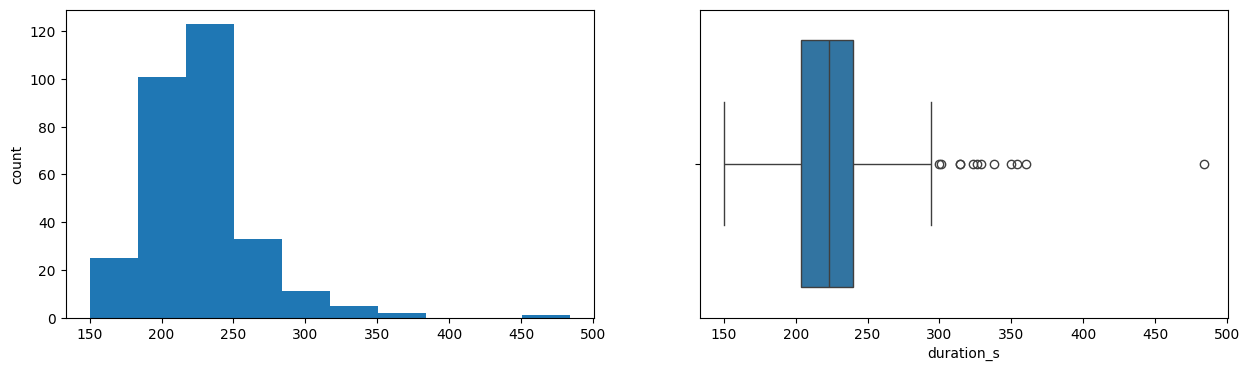

popularity
Skew : -1.12


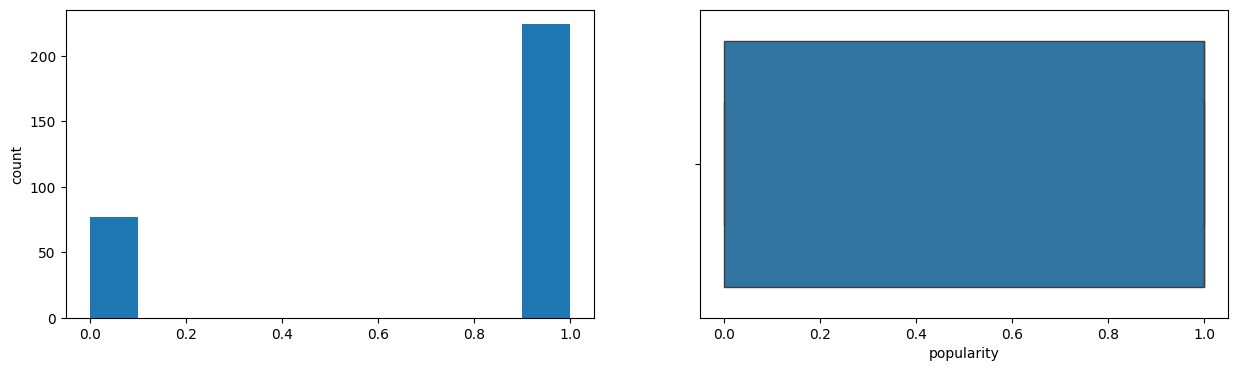

In [ ]:
#### Check the distribution and outliers for numerical columns in the data
data=df
for col in ['duration_s','popularity']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
df.columns

Index(['artist', 'song', 'song_name_len', 'duration_ms', 'explicit', 'year',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genre', 'pop', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin', 'duration_s'],
      dtype='object')

In [ ]:
df.shape

(301, 27)

## Feature Selection

In [ ]:
df_new=df[['artist','duration_s', 'explicit', 'year','danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo','pop', 'rock', 'hiphop', 'dance', 'folk','rnb', 'latin', 'popularity']]
df_new.shape

(301, 21)

In [ ]:
df=df_new

## **Building Classification Models**

---



### K Nearest Neighbors

In [ ]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['UNPOPULAR', 'POPULAR'], yticklabels=['UNPOPULAR', 'POPULAR'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
display(df.shape)

#Separating target variable and other variables
X = (df.iloc[:,:-1])
Y = (df.iloc[:, -1])
Y = Y.astype('int')



(301, 21)

In [ ]:
Y.value_counts()

1    224
0     77
Name: popularity, dtype: int64

In [ ]:
#Creating dummy variables
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(df, drop_first=True)

#Splitting the data into train and test sets

In [ ]:
#Splitting the data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier()
ss = StandardScaler()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1,21):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        X_train_new, X_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.30,random_state=1)

        #let us scale the data
        X_train_new = ss.fit_transform(X_train_new)  #fit_transform the training data
        X_val = ss.transform(X_val) #transform the validation set
        #Fitting knn on training data
        knn.fit(X_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(X_train_new, y_train_new))
        test_error.append(1 - knn.score(X_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.1746031746031748],
 2: [0.08163265306122454, 0.20634920634920648],
 3: [0.0952380952380953, 0.11111111111111116],
 4: [0.061224489795918276, 0.12698412698412698],
 5: [0.08843537414965978, 0.11111111111111116],
 6: [0.07482993197278903, 0.0952380952380953],
 7: [0.12244897959183684, 0.14285714285714285],
 8: [0.10204081632653055, 0.11111111111111116],
 9: [0.1700680272108844, 0.14285714285714285],
 10: [0.1360544217687076, 0.14285714285714285],
 11: [0.21768707482993213, 0.1587301587301587],
 12: [0.18367346938775508, 0.14285714285714285],
 13: [0.2653061224489796, 0.1587301587301587],
 14: [0.23809523809523814, 0.1587301587301587],
 15: [0.28571428571428564, 0.1587301587301587],
 16: [0.2653061224489796, 0.1587301587301587],
 17: [0.2993197278911565, 0.1587301587301587],
 18: [0.2789115646258502, 0.1587301587301587],
 19: [0.2993197278911565, 0.1587301587301587],
 20: [0.2993197278911565, 0.1587301587301587]}

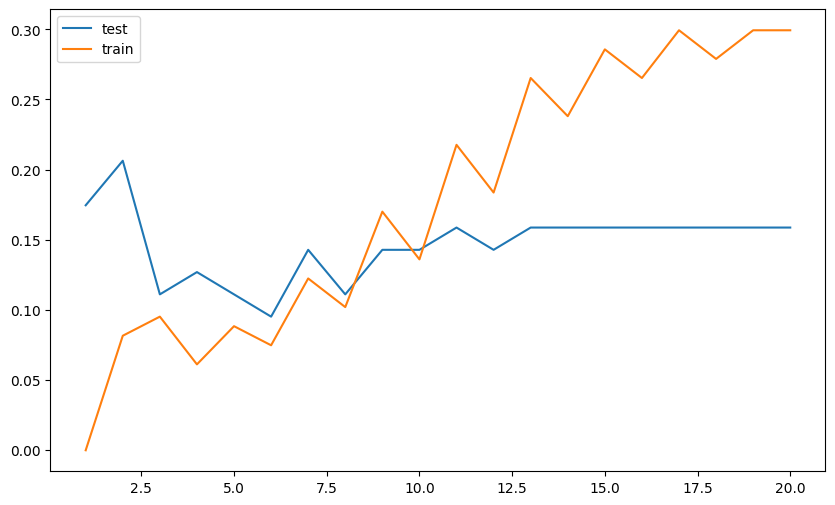

In [ ]:
# Extracting the train and the test error for each k in a list for easy plotting

kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error
plt.figure(figsize=(10,6))
plt.plot(kltest,vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

**Observations:**
- We can see that the train error and the test error are more or less similar for K between 6 and 9.
- This implies that we would get generalized results if we choose a K value between 6 to 9.


# Standardization

### KNN is a distance based algorithm and all distance based algorithms are affected by the scale of the data.
### We will scale the attributes (dataframe X defined above) before building the KNN model.

In [ ]:
# scaling the data
scaler=StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)  #fit_transform the training data
x_test_scaled=pd.DataFrame(scaler.transform(x_test), columns=x_test.columns) #transform the testing data

# Model Fit

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6, weights='distance')
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       156

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



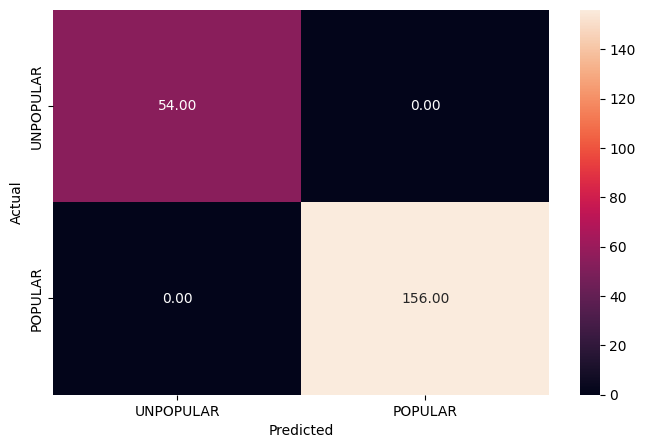

In [ ]:
#predict on train data
y_pred_train_knn =knn.predict(x_train_scaled)

#checking performance of the model
metrics_score(y_train, y_pred_train_knn)

Observations:- KNN model seems to be overfitting on the training dataset. Let us check the performance on the test set.

# Test

In [ ]:
import sklearn.metrics as mt

#predict on test data
y_pred_test_knn = knn.predict(x_test_scaled)

              precision    recall  f1-score   support

           0       0.33      0.09      0.14        23
           1       0.75      0.94      0.84        68

    accuracy                           0.73        91
   macro avg       0.54      0.51      0.49        91
weighted avg       0.65      0.73      0.66        91



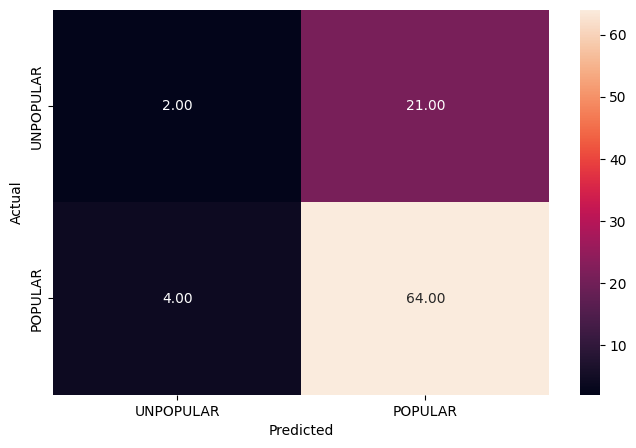

In [ ]:
#checking performance of the model
metrics_score(y_test, y_pred_test_knn)

In [ ]:
roc_auc_score(y_test, y_pred_test_knn)

0.5140664961636828

**Observation:

1. The accuracy of the model is about 73% with k=6



# Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

X_scaled = scaler.fit_transform(X)

model = KNeighborsClassifier(n_neighbors = 6)

y_pred_cross = cross_val_predict(model, X_scaled, Y, cv=10)
accuracy = mt.accuracy_score(Y, y_pred_cross)
recall = mt.recall_score(Y, y_pred_cross)
precision = mt.precision_score(Y, y_pred_cross)
f1_score = mt.f1_score(Y, y_pred_cross)
matrix = mt.confusion_matrix(Y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)
print(roc_auc_score(Y, y_pred_cross))

Accuracy:  0.77 

Recall:  1.00 

Precision:  0.76 

F1_score:  0.86 

Confusion Matrix: 
 [[  8  69]
 [  1 223]]
0.5497159090909092


# Parameter Tuning

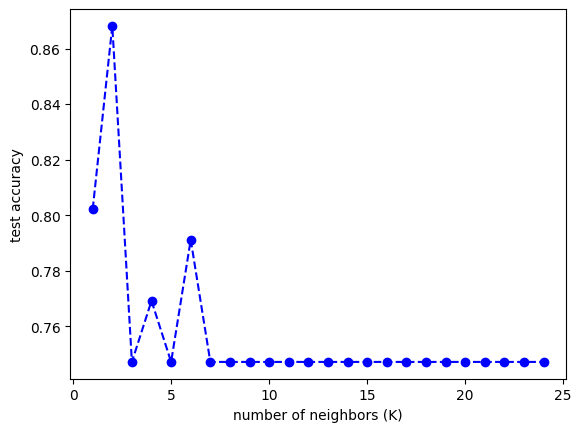

In [ ]:
import matplotlib.pyplot as plt


k_range = range(1,25)

accuracy_list = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy_list.append(mt.accuracy_score(y_test, y_pred))

plt.plot(k_range, accuracy_list, 'o--', color = 'blue')
plt.xlabel("number of neighbors (K)")
plt.ylabel("test accuracy")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = KNeighborsClassifier(n_neighbors = 6)

y_pred_cross = cross_val_predict(model, X, Y, cv=10)
accuracy = mt.accuracy_score(Y, y_pred_cross)
recall = mt.recall_score(Y, y_pred_cross)
precision = mt.precision_score(Y, y_pred_cross)
f1_score = mt.f1_score(Y, y_pred_cross)
matrix = mt.confusion_matrix(Y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)
print(roc_auc_score(Y, y_pred_cross))

Accuracy:  0.69 

Recall:  0.87 

Precision:  0.75 

F1_score:  0.81 

Confusion Matrix: 
 [[ 14  63]
 [ 30 194]]
0.5239448051948052


              precision    recall  f1-score   support

           0       0.32      0.18      0.23        77
           1       0.75      0.87      0.81       224

    accuracy                           0.69       301
   macro avg       0.54      0.52      0.52       301
weighted avg       0.64      0.69      0.66       301



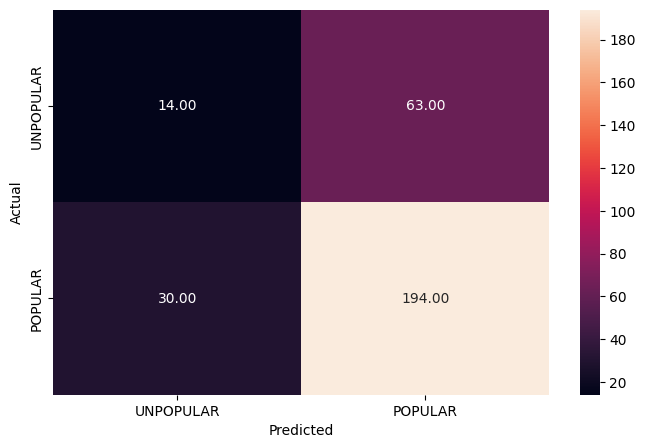

In [ ]:
#checking performance of the model
metrics_score(Y, y_pred_cross)

### Cost Benefit Analysis For KNN

In [ ]:
TP=194
FP=63
TN= 14
FN=30

def calculate_knn_value(TP, FP, FN):
  knn_value = (TP * 1000) - (FP * 500) - (FN * 100)
  return knn_value

knn_value = calculate_knn_value(TP, FP, FN)
print("KNN_Model_Value:", knn_value)

KNN_Model_Value: 159500


# Decision Tree

### Building a simple Decision Tree model and evaluating it

In [ ]:
## Choosing X and Y variables
df['artist_numerical'] = df['artist'].astype('category').cat.codes
X_dt = df[['artist_numerical','duration_s', 'explicit', 'year','danceability', 'energy','speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo','pop', 'rock', 'hiphop', 'dance', 'folk','rnb', 'latin']]
Y = df['popularity']

X_dt.info()

In [ ]:
## Building a decision tree model

dt = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split = 5, random_state=1)

dt = dt.fit(X_dt, Y)

y_pred = dt.predict(X_dt)

In [ ]:
# validation
import sklearn.metrics as mt

def print_performance (Y, y_pred):
  accuracy = mt.accuracy_score(Y, y_pred)
  recall = mt.recall_score(Y, y_pred)
  precision = mt.precision_score(Y, y_pred)
  f1_score = mt.f1_score(Y, y_pred)
  matrix = mt.confusion_matrix(Y, y_pred)

  print('Accuracy: ', format(accuracy,'.2f'),'\n')
  print('Recall: ', format(recall,'.2f'),'\n')
  print('Precision: ', format(precision,'.2f'),'\n')
  print('F1_score: ', format(f1_score,'.2f'),'\n')
  print('Confusion Matrix:','\n', matrix)

print_performance(Y,y_pred)
print('Train_Accuracy: ', dt.score(X_dt, Y),'\n')

Accuracy:  0.91 

Recall:  1.00 

Precision:  0.89 

F1_score:  0.94 

Confusion Matrix: 
 [[ 49  28]
 [  0 224]]
Train_Accuracy:  0.9069767441860465 



### 10 Fold Cross-Validation:


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

y_pred_cross = cross_val_predict(dt, X_dt, Y, cv=10)
print_performance(Y, y_pred_cross)


Accuracy:  0.65 

Recall:  0.76 

Precision:  0.77 

F1_score:  0.77 

Confusion Matrix: 
 [[ 25  52]
 [ 53 171]]


In [ ]:
## let's tweak the model a little bit and see if we can get a better accuracy
dt_2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split = 3, random_state=1)

y_pred_cross_dt2 = cross_val_predict(dt_2, X_dt, Y, cv=10)

print_performance(Y,y_pred_cross_dt2)

Accuracy:  0.68 

Recall:  0.82 

Precision:  0.77 

F1_score:  0.79 

Confusion Matrix: 
 [[ 22  55]
 [ 41 183]]


### > Parameter Turning

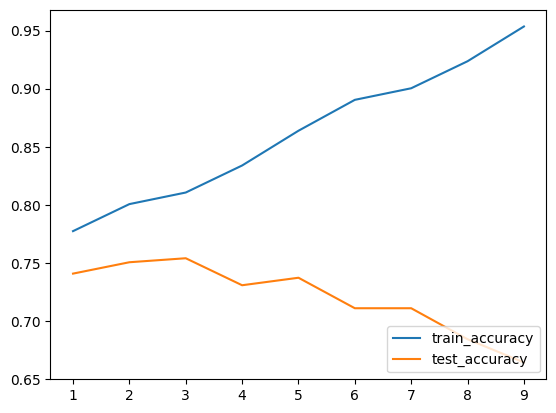

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(1, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X_dt, Y)
    train_accuracy.append(accuracy_score(Y, model1.predict(X_dt)))
    mean_test_accuracy.append(cross_val_score(model1, X_dt, Y, scoring="accuracy", cv=10).mean())


plt.plot(np.arange(1, 10), train_accuracy)
plt.plot(np.arange(1, 10), mean_test_accuracy)
plt.legend(["train_accuracy", "test_accuracy"], loc ="lower right")
plt.show()

The graph above indicates that maximum depth = 3 is the most optimal depth here

In [ ]:
from sklearn.model_selection import GridSearchCV

t_clf = DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'min_samples_split': [5, 30, 40],
              'splitter': ['best', 'random'],}

grid_dt = GridSearchCV(dt_2, param_grid = parameters, cv = 10 )

grid_dt.fit(X_dt, Y)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
7,4,5,random,0.777419
9,4,30,random,0.774194
11,4,40,random,0.767527
23,6,40,random,0.753978
3,3,30,random,0.747634
21,6,30,random,0.747312
17,5,40,random,0.747312
25,7,5,random,0.743978
27,7,30,random,0.740968
5,3,40,random,0.740968


Accuracy:  0.74 

Recall:  0.93 

Precision:  0.77 

F1_score:  0.84 

Confusion Matrix: 
 [[ 14  63]
 [ 15 209]]
              precision    recall  f1-score   support

           0       0.48      0.18      0.26        77
           1       0.77      0.93      0.84       224

    accuracy                           0.74       301
   macro avg       0.63      0.56      0.55       301
weighted avg       0.70      0.74      0.69       301



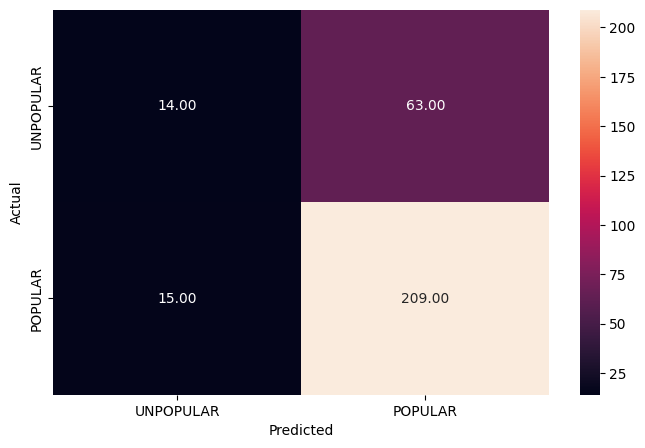

In [ ]:
## max depth = 3, min split = 4
dt_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split = 4, random_state=1)

y_pred_cross_dt3 = cross_val_predict(dt_3, X_dt, Y, cv=10)

print_performance(Y,y_pred_cross_dt3)
metrics_score(Y, y_pred_cross_dt3)

In [ ]:
print(f"The value of the Decision Tree Model is: {(209 * 1000) - (63 * 500) - (15 * 100)}")

The value of the Decision Tree Model is: 176000


### > Visualizing

In [ ]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


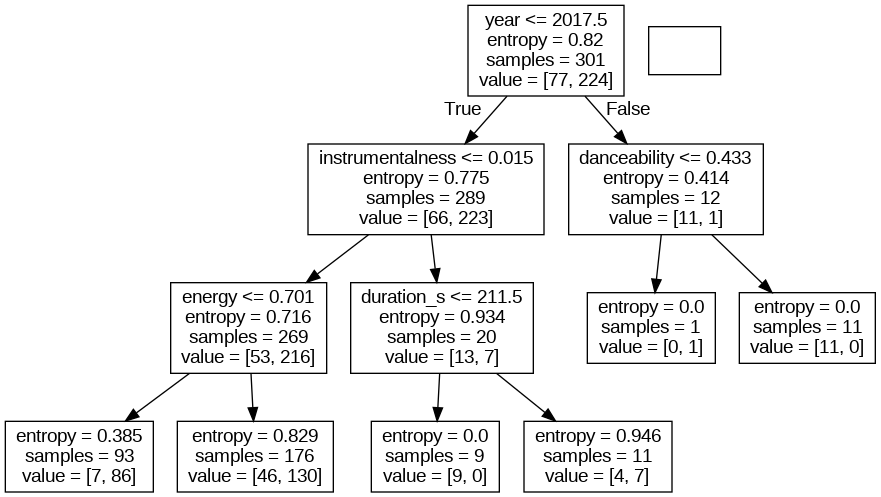

In [ ]:
feature_names = X_dt.columns.tolist()
target_name = np.array(['Popular', 'Not Popular'])

dt_3 = dt_3.fit(X_dt,Y)
dt_dot_data = tree.export_graphviz(dt_3, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data
draw_decision_tree(dt_3)

In [ ]:
print_performance(Y,y_pred_cross_dt3)

Accuracy:  0.74 

Recall:  0.93 

Precision:  0.77 

F1_score:  0.84 

Confusion Matrix: 
 [[ 14  63]
 [ 15 209]]


# Logistic Regression
### (coded in R)

In [ ]:
###importing libraries
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
###importing dataset
file_path='/content/drive/MyDrive/songs-4.csv'

songs_4 <- read_csv(file_path, col_types = cols(year = col_date(format = "%Y")))


In [ ]:
##Selecting attributes

songs <- songs_4 %>% select(!artist)

songs <- songs %>% select(!song)

songs <- songs %>% select(!genre)


In [ ]:
##transformations to the data

##lubridate so year = year only

songs <- songs %>% mutate(year = year(year))



In [ ]:
##transform duration into log10

songslog <- songs %>% mutate(logduration = log10(duration_ms))

In [ ]:
##other needed transforms

songslog <- songslog %>% mutate(explicit = as.numeric(explicit))

songslog <- songslog %>% mutate(popularity = ifelse(popularity > 50,1,0))

summary(songslog)


 song_name_len    duration_ms        explicit           year     
 Min.   : 2.00   Min.   :150400   Min.   :0.0000   Min.   :2012  
 1st Qu.: 9.00   1st Qu.:204280   1st Qu.:0.0000   1st Qu.:2012  
 Median :14.00   Median :223386   Median :0.0000   Median :2013  
 Mean   :18.47   Mean   :226028   Mean   :0.1993   Mean   :2013  
 3rd Qu.:26.00   3rd Qu.:240400   3rd Qu.:0.0000   3rd Qu.:2014  
 Max.   :75.00   Max.   :484146   Max.   :1.0000   Max.   :2020  
   popularity      danceability        energy            key        
 Min.   :0.0000   Min.   :0.1800   Min.   :0.0549   Min.   : 0.000  
 1st Qu.:0.0000   1st Qu.:0.5600   1st Qu.:0.6520   1st Qu.: 2.000  
 Median :1.0000   Median :0.6600   Median :0.7710   Median : 5.000  
 Mean   :0.7442   Mean   :0.6478   Mean   :0.7370   Mean   : 5.309  
 3rd Qu.:1.0000   3rd Qu.:0.7290   3rd Qu.:0.8440   3rd Qu.: 8.000  
 Max.   :1.0000   Max.   :0.9640   Max.   :0.9850   Max.   :11.000  
    loudness            mode         speechiness       

In [ ]:
##correlation matrix output

cormatrix <- cor(songslog)

write.csv(cormatrix, 'songslogmatrix.csv', append = FALSE)


Warning message in write.csv(cormatrix, "songslogmatrix.csv", append = FALSE):
“attempt to set 'append' ignored”


In [ ]:
fullmodel <- glm(popularity ~ song_name_len + explicit + year + danceability + energy +

                      key + loudness + mode + speechiness + acousticness +

                      instrumentalness + liveness + valence + tempo +

                      pop + rock + hiphop + dance + folk + rnb + latin + logduration,

                  data = songslog, family = binomial)

summary(fullmodel)



Call:
glm(formula = popularity ~ song_name_len + explicit + year + 
    danceability + energy + key + loudness + mode + speechiness + 
    acousticness + instrumentalness + liveness + valence + tempo + 
    pop + rock + hiphop + dance + folk + rnb + latin + logduration, 
    family = binomial, data = songslog)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      994.514006 212.414394   4.682 2.84e-06 ***
song_name_len      0.018330   0.013200   1.389  0.16494    
explicit          -0.434773   0.467543  -0.930  0.35242    
year              -0.498297   0.105609  -4.718 2.38e-06 ***
danceability      -2.128607   1.620023  -1.314  0.18887    
energy            -4.810569   1.827438  -2.632  0.00848 ** 
key                0.044443   0.043270   1.027  0.30436    
loudness           0.103226   0.124923   0.826  0.40862    
mode               0.255443   0.316779   0.806  0.42003    
speechiness       -1.753714   2.226995  -0.787  0.43100    
acousticness

In [ ]:
glm(formula = popularity ~ song_name_len + explicit + year +

    danceability + energy + key + loudness + mode + speechiness +

    acousticness + instrumentalness + liveness + valence + tempo +

    pop + rock + hiphop + dance + folk + rnb + latin + logduration,

    family = binomial, data = songslog)




Call:  glm(formula = popularity ~ song_name_len + explicit + year + 
    danceability + energy + key + loudness + mode + speechiness + 
    acousticness + instrumentalness + liveness + valence + tempo + 
    pop + rock + hiphop + dance + folk + rnb + latin + logduration, 
    family = binomial, data = songslog)

Coefficients:
     (Intercept)     song_name_len          explicit              year  
      994.514006          0.018330         -0.434773         -0.498297  
    danceability            energy               key          loudness  
       -2.128607         -4.810569          0.044443          0.103226  
            mode       speechiness      acousticness  instrumentalness  
        0.255443         -1.753714          0.510485         -1.305465  
        liveness           valence             tempo               pop  
       -0.321630          0.704855          0.007651          0.103269  
            rock            hiphop             dance              folk  
        0.4013

In [ ]:
songslog %>% count(folk)


songslog <- songslog %>% select(-folk)

genres <- songslog %>% count(latin)

print(genres)



folk,n
<dbl>,<int>
0,300
1,1


# A tibble: 2 × 2
  latin     n
  <dbl> <int>
1     0   295
2     1     6


#Splitting the data into train and test sets

In [ ]:
set.seed(321)

training.samples <- createDataPartition(songslog$popularity, p = 0.7, list = FALSE)

train.data  <- songslog[training.samples, ]

test.data <- songslog[-training.samples, ]

## **Stepwise given model on entire dataset**

In [ ]:
{
  stepbasedmodel <- glm(popularity ~ song_name_len + year +
                             danceability + energy  + rock +
                             hiphop + dance + rnb + latin,
                 data = songslog, family = binomial)
print("Model based on complete dataset: ")
summary(stepbasedmodel)
}
{
fullmodelfits <- ifelse(stepbasedmodel$fitted.values > 0.5,1,0)
confusionMatrix(as.factor(songslog$popularity), as.factor(fullmodelfits))
}
{
fullTP <- sum(fullmodelfits == 1 & songslog$popularity == 1)
fullFP <- sum(fullmodelfits == 1 & songslog$popularity == 0)
fullFN <- sum(fullmodelfits == 0 & songslog$popularity == 1)
fullprecision <- fullTP / (fullTP + fullFP)
fullrecall <- fullTP / (fullTP + fullFN)
fullF1_score <- 2 * fullprecision * fullrecall / (fullprecision + fullrecall)
print(paste("Precision:", fullprecision))
print(paste("Recall:", fullrecall))
print(paste("F1-score:", fullF1_score))

}

[1] "Model based on complete dataset: "



Call:
glm(formula = popularity ~ song_name_len + year + danceability + 
    energy + rock + hiphop + dance + rnb + latin, family = binomial, 
    data = songslog)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1021.09319  204.87410   4.984 6.23e-07 ***
song_name_len    0.01865    0.01281   1.456  0.14549    
year            -0.50456    0.10167  -4.963 6.96e-07 ***
danceability    -2.36553    1.28069  -1.847  0.06474 .  
energy          -3.61689    1.28141  -2.823  0.00476 ** 
rock             0.46680    0.57190   0.816  0.41437    
hiphop           0.24468    0.34838   0.702  0.48247    
dance           -0.86156    0.32273  -2.670  0.00759 ** 
rnb              0.29458    0.58369   0.505  0.61378    
latin            0.10488    1.14247   0.092  0.92685    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 342.32  on 300  degrees of freedom
Residual devia

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  24  53
         1  10 214
                                          
               Accuracy : 0.7907          
                 95% CI : (0.7403, 0.8353)
    No Information Rate : 0.887           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.327           
                                          
 Mcnemar's Test P-Value : 1.213e-07       
                                          
            Sensitivity : 0.70588         
            Specificity : 0.80150         
         Pos Pred Value : 0.31169         
         Neg Pred Value : 0.95536         
             Prevalence : 0.11296         
         Detection Rate : 0.07973         
   Detection Prevalence : 0.25581         
      Balanced Accuracy : 0.75369         
                                          
       'Positive' Class : 0               
                              

[1] "Precision: 0.801498127340824"
[1] "Recall: 0.955357142857143"
[1] "F1-score: 0.871690427698574"


## **Cross Validation**

In [ ]:
{
  set.seed(420)
  crossfold <- trainControl(method = "cv", number = 10)
  cvcheck <- train(popularity ~ song_name_len + year +
                             danceability + energy  + rock +
                             hiphop + dance + rnb + latin, data = songslog, method = "glm", trControl = crossfold, metric = "Accuracy", maximize = TRUE)
}
print(cvcheck)

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


ERROR: Error: Metric Accuracy not applicable for regression models


# **Mean accuracy from cross validation**

In [ ]:
cvresample <- cvcheck$resample
cvaccuracy <- cvresample %>% select(Accuracy)
mean(cvaccuracy$Accuracy)

ERROR: Error in eval(expr, envir, enclos): object 'cvcheck' not found


### **Logistic model based on stepwise outcome with training set**

In [ ]:
{

stepbasedmodeltrain <- glm(popularity ~ song_name_len + year +

                             danceability + energy  + rock +

                             hiphop + dance + rnb + latin,

                 data = train.data, family = binomial)

summary(stepbasedmodeltrain)

}


ERROR: Error in eval(mf, parent.frame()): object 'train.data' not found


In [ ]:
glm(formula = popularity ~ song_name_len + year + danceability +

    energy + rock + hiphop + dance + rnb + latin, family = binomial,

    data = train.data)



ERROR: Error in eval(mf, parent.frame()): object 'train.data' not found


In [ ]:
{

modelfits <- ifelse(stepbasedmodeltrain$fitted.values > 0.5,1,0)

confusionMatrix(as.factor(train.data$popularity), as.factor(modelfits))

}


In [ ]:
{



##model1outcomes <- as.data.frame(predictedpop)

fitTP <- sum(modelfits == 1 & train.data$popularity == 1)

fitFP <- sum(modelfits == 1 & train.data$popularity == 0)

fitFN <- sum(modelfits == 0 & train.data$popularity == 1)

fitprecision <- fitTP / (fitTP + fitFP)

fitrecall <- fitTP / (fitTP + fitFN)

fitF1_score <- 2 * fitprecision * fitrecall / (fitprecision + fitrecall)

print(paste("Precision:", fitprecision))

print(paste("Recall:", fitrecall))

print(paste("F1-score:", fitF1_score))



}



# Test

In [ ]:
predictions <- predict(stepbasedmodeltrain, newdata = test.data, type = 'response', na.action = na.exclude)

predictedpop <- ifelse(predictions > 0.5,1,0)

confusionMatrix(as.factor(test.data$popularity), as.factor(predictedpop))


In [ ]:
{

model1outcomes <- predictedpop

model1outcomes <- as.data.frame(predictedpop)

TP <- sum(model1outcomes == 1 & test.data$popularity == 1)

FP <- sum(model1outcomes == 1 & test.data$popularity == 0)

FN <- sum(model1outcomes == 0 & test.data$popularity == 1)

precision <- TP / (TP + FP)

recall <- TP / (TP + FN)

F1_score <- 2 * precision * recall / (precision + recall)

print(paste("Precision:", precision))

print(paste("Recall:", recall))

print(paste("F1-score:", F1_score))

}



In [ ]:
valueofmodel <- sum(TP * 1000, -(FP * 500), -(FN * 100))

print(paste("The value of this model is: $",valueofmodel))

